In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import os
from inspect import cleandoc
import timeit
from experiments.benchmark_utils import do_op_instrumentation_benchmarks, \
    do_op_inspections_benchmarks, OperatorBenchmarkType
import matplotlib
import statistics

from mlinspect.utils import get_project_root

Defined plot_runtimes, example output:


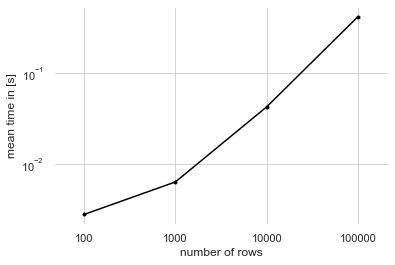

In [2]:
def plot_runtimes(run_row_numbers, time_per_run, title_and_path, save_to_file=False):
    # Data for plotting
    np_times = np.array(time_per_run)
    np_row_numbers = np.array(run_row_numbers)

    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    
    ax.set_yscale('log') # TODO: Decide how to plot this
    ax.plot(np_times, marker='o', color='black', markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    #fig.set_size_inches(8, 10)
    ax.axis('equal')
    #plt.locator_params("y", numticks=12)
    #major_ticks = [0.001, 0.01, 0.1, 1., 10.][:len(run_row_numbers)]
    #ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time in [s]')
    ax.grid(True, color='lightgrey')
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()
    
test_row_numbers = [100, 1000, 10000, 100000]
test_plot_runtimes = [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]

print('Defined plot_runtimes, example output:')
plot_runtimes(test_row_numbers, test_plot_runtimes, 'test_plot_runtimes')

Defined plot_runtimes_all, example output:


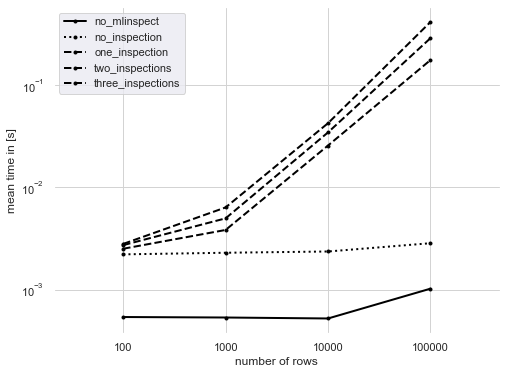

In [3]:
def plot_runtimes_all(run_row_numbers, benchmark_results, linestyles, title_and_path, save_to_file=False):
    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    ax.set_yscale('log') # TODO: Decide how to plot this
    
    #ax.plot(losses_orig, marker='o', color='black', linewidth=2, linestyle='dashed', label="orig")
    for label, results in benchmark_results.items():
        # Data for plotting
        np_times = np.array(results)
        if label in linestyles:
            linestyle = linestyles[label]
            ax.plot(np_times, marker='o', color='black', linewidth=2, linestyle=linestyle, label=label, markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    fig.set_size_inches(8, 6)
    ax.axis('equal')
    # major_ticks = np.arange(0, 10, 3)
    # ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time in [s]')
    ax.grid(True, color='lightgrey')
    
    plt.legend()
    
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()

test_row_numbers = [100, 1000, 10000, 100000]
test_benchmark_results = {\
    "no_mlinspect": [0.0005420450000000798, 0.0005361602000002463, 0.0005246571999999005, 0.0010252619999999268],
    "no_inspection": [0.0022168788499999257, 0.0022983642499999402, 0.0023646199999999506, 0.0028484614500001726],
    "one_inspection": [0.002515717000000084, 0.0038362508500000116, 0.025606818549999976, 0.17484780609999992],
    "two_inspections": [0.002726666, 0.004980573499999963, 0.03439934060000005, 0.28592700379999964],
    "three_inspections": [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]
}

print('Defined plot_runtimes_all, example output:')
linestyles = {"no_mlinspect": "solid", 
             "no_inspection": "dotted", 
             "one_inspection": "dashed", 
             "two_inspections": "dashed", 
             "three_inspections": "dashed"}
plot_runtimes_all(test_row_numbers, test_benchmark_results, linestyles, 'test_plot_runtimes_all')

In [4]:
def benchmark_op_instrumentation_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles):
    print("Instrumentation Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_instrumentation_benchmarks(row_number, op_type)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [5]:
def benchmark_op_inspections_and_plot_result(op_type: OperatorBenchmarkType, plot_linestyles):
    print("Inspection Results for {}".format(op_type.value))
    mean_benchmark_results = {}

    for row_number in row_numbers:
        benchmark_results = do_op_inspections_benchmarks(row_number, op_type)
        for label, results in benchmark_results.items():
            current_list = mean_benchmark_results.get(label, [])
            current_list.append(statistics.mean(results))
            mean_benchmark_results[label] = current_list

        print("Done: {}".format(row_number))

    for label, results in mean_benchmark_results.items():
        print("{}: {}".format(label, results))
    
    plot_runtimes_all(row_numbers, mean_benchmark_results, plot_linestyles, 'all_runtimes_projection')

In [17]:
#row_numbers = [100, 1000, 10000]
row_numbers = [100, 1000, 10000, 100000]
#row_numbers = [100, 1000, 10000, 100000, 1000000]

instrumentation_linestyles = {"no mlinspect": "solid", # Can be commented out to remove it from plot
    "no inspection": "dotted", 
    "one inspection": "dashed", 
    "two inspections": "dashed", 
    "three inspections": "dashed"}

inspection_linestyles = {"empty inspection": "solid",
    "MaterializeFirstRowsInspection(10)": "dotted", 
    "LineageInspection(10)": "dashed", 
    "HistogramInspection(['group_col'])": "dashdot"}

Instrumentation Results for projection
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0007832354000000486, 0.0005432479000001322, 0.0006018832000000529, 0.0008036492999996981]
no inspection: [0.0025618867000001266, 0.0024188242999999333, 0.0024321228000001582, 0.002339614200000106]
one inspection: [0.0024421107000001108, 0.004797170700000031, 0.019699824199999938, 0.17664997319999998]
two inspections: [0.00290089939999989, 0.00531485670000027, 0.030486766299999867, 0.2763415138000006]
three inspections: [0.0029043971999999306, 0.006421655300000051, 0.040869112999999936, 0.3834035199000006]


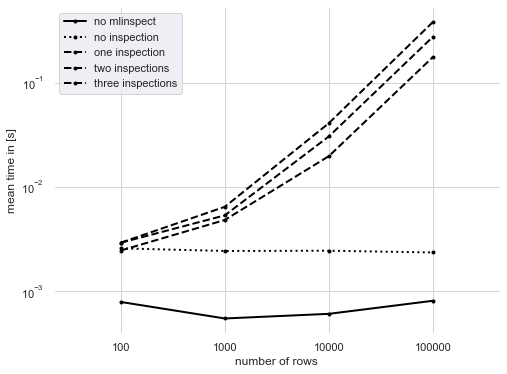

In [7]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.PROJECTION, instrumentation_linestyles)

Instrumentation Results for selection
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.000701704999999464, 0.0004248346000004233, 0.0005630922000001704, 0.0019608104999988994]
no inspection: [0.0054197202000001, 0.004835236099998852, 0.006084888100001962, 0.017249747900000046]
one inspection: [0.008955985000000766, 0.011809490200000283, 0.03878919300000092, 0.30900799389999917]
two inspections: [0.009034894400000226, 0.01303100940000057, 0.053516349599999555, 0.4660726581000013]
three inspections: [0.009656142199999352, 0.014378222900000636, 0.0702928919999998, 0.6233041059999997]


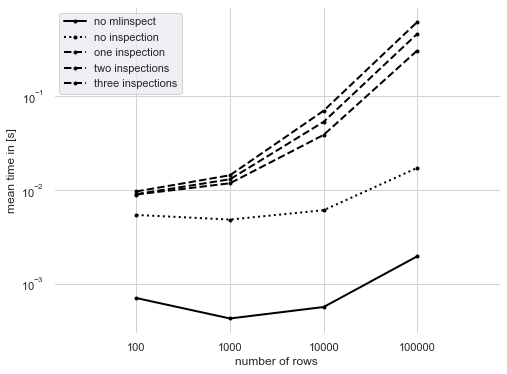

In [8]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.SELECTION, instrumentation_linestyles)

Instrumentation Results for join
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0024736888000013836, 0.0017469288999997445, 0.003231394399999488, 0.019025124899999923]
no inspection: [0.006365058800000156, 0.006610857500000122, 0.010331262700002241, 0.056648454799997694]
one inspection: [0.014544588799999047, 0.017138107699998528, 0.0525146093000032, 0.43428414750000144]
two inspections: [0.014176083900002112, 0.018417229000000646, 0.06723152690000375, 0.5885493839999981]
three inspections: [0.01493740439999911, 0.019695243199997492, 0.08163887709999926, 0.709437263300002]


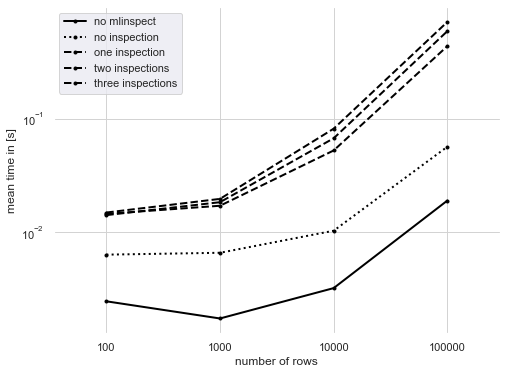

In [9]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.JOIN, instrumentation_linestyles)

Instrumentation Results for one_hot_encoder
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0007496368999994729, 0.0006754574999987995, 0.0023190945000010287, 0.017022098200000356]
no inspection: [0.0024244882000004964, 0.00218895230000129, 0.0036376305999979764, 0.018563974400002792]
one inspection: [0.0022816098000006946, 0.004242342499998131, 0.0182939874000013, 0.15943148520000108]
two inspections: [0.002539782799999557, 0.0047005094999988725, 0.028302459200001805, 0.26599895850000055]
three inspections: [0.0026156177000004276, 0.00605982719999929, 0.037477065299999876, 0.36458209750000065]


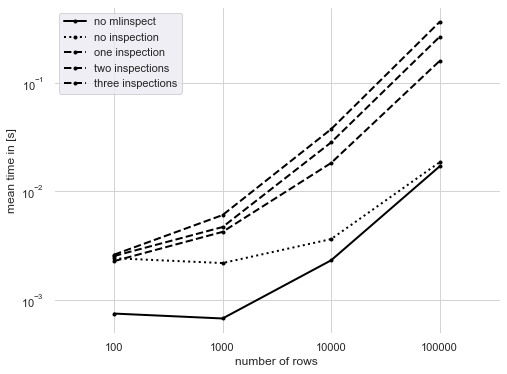

In [10]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, instrumentation_linestyles)

Instrumentation Results for standard_scaler
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.003139060299997709, 0.0024714157000005343, 0.0028561343999996326, 0.003110962099995618]
no inspection: [0.0041799572000002175, 0.0036946418000013636, 0.0038593453000004274, 0.0042837966000035975]
one inspection: [0.003903957100000355, 0.005164795400001765, 0.01876481479999086, 0.15172248570000874]
two inspections: [0.004496607199999403, 0.0061170458999995955, 0.03192115459999627, 0.25171036109999817]
three inspections: [0.004207316699999808, 0.007073182899999609, 0.0429514431000058, 0.34505205129999866]


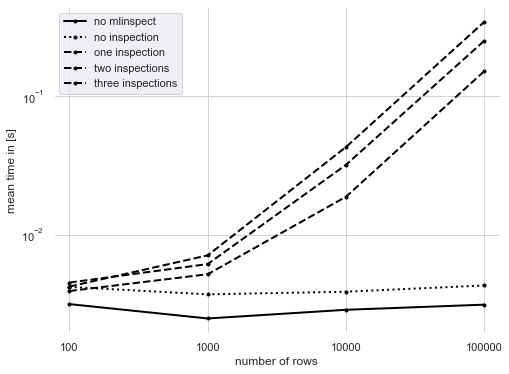

In [11]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.STANDARD_SCALER, instrumentation_linestyles)

Instrumentation Results for decision_tree
Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0032089958000028674, 0.010086117100001957, 0.06339252899999508, 0.625667314399999]
no inspection: [0.004570177399995145, 0.011839269900005434, 0.06286178150000125, 0.6198296533999951]
one inspection: [0.008711416399995642, 0.022809266200002298, 0.1413280211999961, 1.3404972252000023]
two inspections: [0.008803089300002398, 0.023684534399998826, 0.15760366919999172, 1.6129699206000025]
three inspections: [0.009132527400001322, 0.024876960900002132, 0.16759703430000172, 1.6851368605999966]


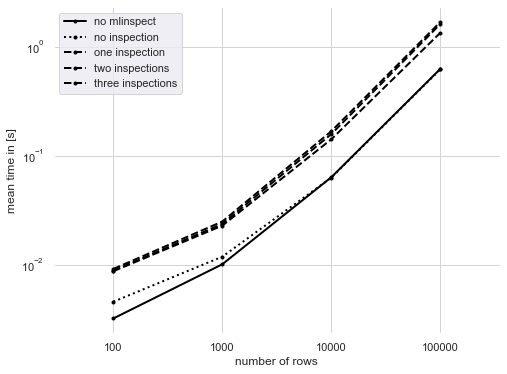

In [12]:
benchmark_op_instrumentation_and_plot_result(OperatorBenchmarkType.DECISION_TREE, instrumentation_linestyles)

Inspection Results for projection
Done: 100
Done: 1000
Done: 10000
Done: 100000
empty inspection: [0.0037872634000109427, 0.004787805399996614, 0.02309042380001074, 0.18929117740001403]
MaterializeFirstRowsInspection(10): [0.003594338000004882, 0.004487327200001801, 0.02339748580000105, 0.19950897859999941]
LineageInspection(10): [0.003354749599986917, 0.0049494055999957706, 0.02598441019998745, 0.21145650819997855]
HistogramInspection(['group_col']): [0.0028352071999961483, 0.00639744080001492, 0.028653415200017206, 0.2612433453999984]


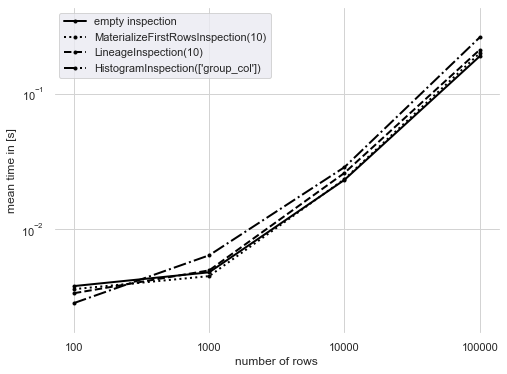

In [18]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.PROJECTION, inspection_linestyles)

Inspection Results for selection
Done: 100
Done: 1000
Done: 10000
Done: 100000
empty inspection: [0.011954125200009002, 0.013242643399985354, 0.041774076800004424, 0.3082851995999931]
MaterializeFirstRowsInspection(10): [0.010491288400010035, 0.013713584400011313, 0.043163104800009934, 0.3229716392000114]
LineageInspection(10): [0.01162262320000309, 0.013841481399992972, 0.04465427019999879, 0.36482650419999346]
HistogramInspection(['group_col']): [0.009144777799997427, 0.014946543799987921, 0.05148111420000987, 0.4436876744000074]


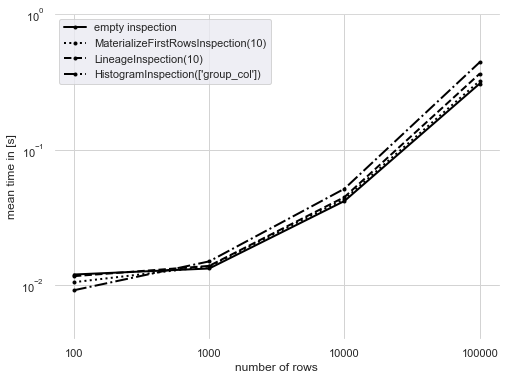

In [19]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.SELECTION, inspection_linestyles)

Inspection Results for join
Done: 100
Done: 1000
Done: 10000
Done: 100000
empty inspection: [0.018924686000002567, 0.018553838000013912, 0.058491822800021964, 0.4279067744000031]
MaterializeFirstRowsInspection(10): [0.01713360600000442, 0.02124157880001576, 0.058588404399995395, 0.4397692293999967]
LineageInspection(10): [0.016579406599998948, 0.018508512599998993, 0.06317622140001049, 0.6008279050000056]
HistogramInspection(['group_col']): [0.014241771199988307, 0.019768913600000815, 0.061597678799989806, 0.5751962742000046]


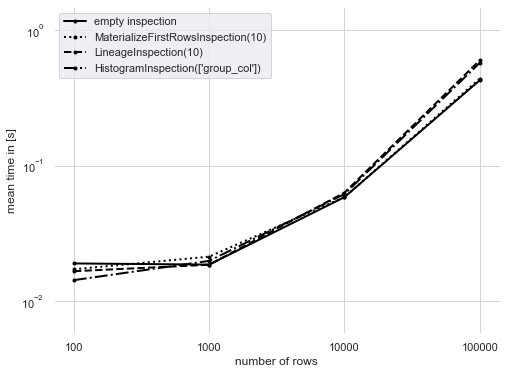

In [20]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.JOIN, inspection_linestyles)

Inspection Results for one_hot_encoder
Done: 100
Done: 1000
Done: 10000
Done: 100000
empty inspection: [0.0030673707999881116, 0.003812796400006846, 0.017990981000002647, 0.15617643519997274]
MaterializeFirstRowsInspection(10): [0.0035613117999787392, 0.004136153399986142, 0.01984714239998766, 0.1677851985999837]
LineageInspection(10): [0.0030735661999983675, 0.00455252639999344, 0.01991155839999692, 0.18099174919999542]
HistogramInspection(['group_col']): [0.0023354767999990145, 0.004336484999987534, 0.025114769400011026, 0.23136163480002098]


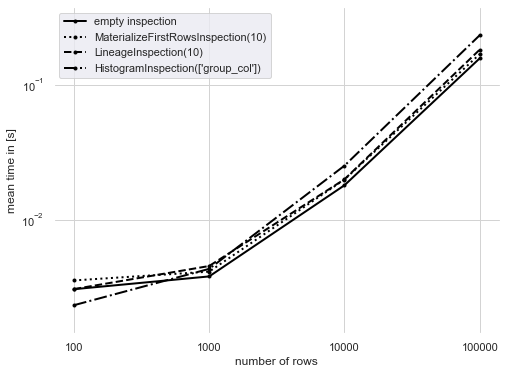

In [21]:
benchmark_op_inspections_and_plot_result(OperatorBenchmarkType.ONE_HOT_ENCODER, inspection_linestyles)